In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("A2.csv")

In [4]:
df.head()

,Math_Score,Reading_Score,Writing_Score,placementscore,Club_Join_Date .,offer
0,76.0,55.0,80.0,92.0,2021.0,3.0
1,67.0,91.0,72.0,40.0,2021.0,1.0
2,65.0,77.0,65.0,92.0,2021.0,3.0
3,69.0,85.0,67.0,84.0,NaN,2.0
4,65.0,89.0,NaN,100.0,2019.0,3.0


In [5]:
df.shape

(29, 6)

In [6]:
df.dtypes

Math_Score          float64
Reading_Score       float64
Writing_Score       float64
placementscore      float64
Club_Join_Date .    float64
offer               float64
dtype: object

In [7]:
df.isna().sum()

Math_Score          1
Reading_Score       1
Writing_Score       1
placementscore      1
Club_Join_Date .    2
offer               2
dtype: int64

In [9]:
cols_with_na=[]
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)
cols_with_na

['Math_Score',
 'Reading_Score',
 'Writing_Score',
 'placementscore',
 'Club_Join_Date .',
 'offer']

In [10]:
for col in cols_with_na:
    col_dt=df[col].dtypes
    if(col_dt=='int64' or col_dt=='float64'):
        outliers=(df[col]<0) |(100<df[col])
        df.loc[outliers,col]=np.nan
        df[col]=df[col].fillna(df[col].mean())
    else:
        df[col]=df[col].fillna(method="ffill")
df.head()
        

,Math_Score,Reading_Score,Writing_Score,placementscore,Club_Join_Date .,offer
0,76.0,55.0,80.000000,92.0,NaN,3.0
1,67.0,91.0,72.000000,40.0,NaN,1.0
2,65.0,77.0,65.000000,92.0,NaN,3.0
3,69.0,85.0,67.000000,84.0,NaN,2.0
4,65.0,89.0,70.571429,100.0,NaN,3.0


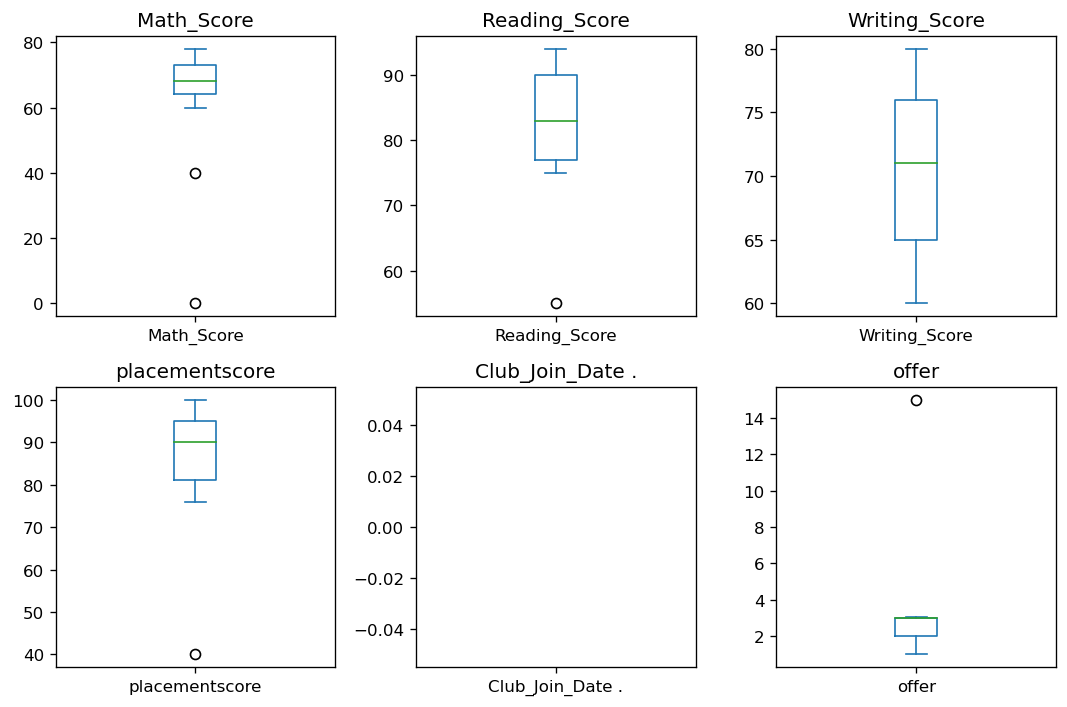

In [18]:
df_list=['Math_Score','Reading_Score' ,'Writing_Score'
            ,'placementscore','Club_Join_Date .','offer']
fig,axes=plt.subplots(2,3 ,figsize=(9,6),dpi=120)

for i, ax in enumerate(axes.flat):
    if i < len(df_list):
        df[df_list[i]].plot(kind='box', ax=ax)
        ax.set_title(df_list[i])
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [21]:
Q1 = df['Writing_Score'].quantile(0.25)
Q3 = df['Writing_Score'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR
print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')

Q1 = 65.0, Q3 = 76.0, IQR = 11.0, Lower_limit = 48.5, Upper_limit = 92.5


In [22]:
df[(df['Writing_Score'] < Lower_limit) | (df['Writing_Score'] > Upper_limit)]

,Math_Score,Reading_Score,Writing_Score,placementscore,Club_Join_Date .,offer


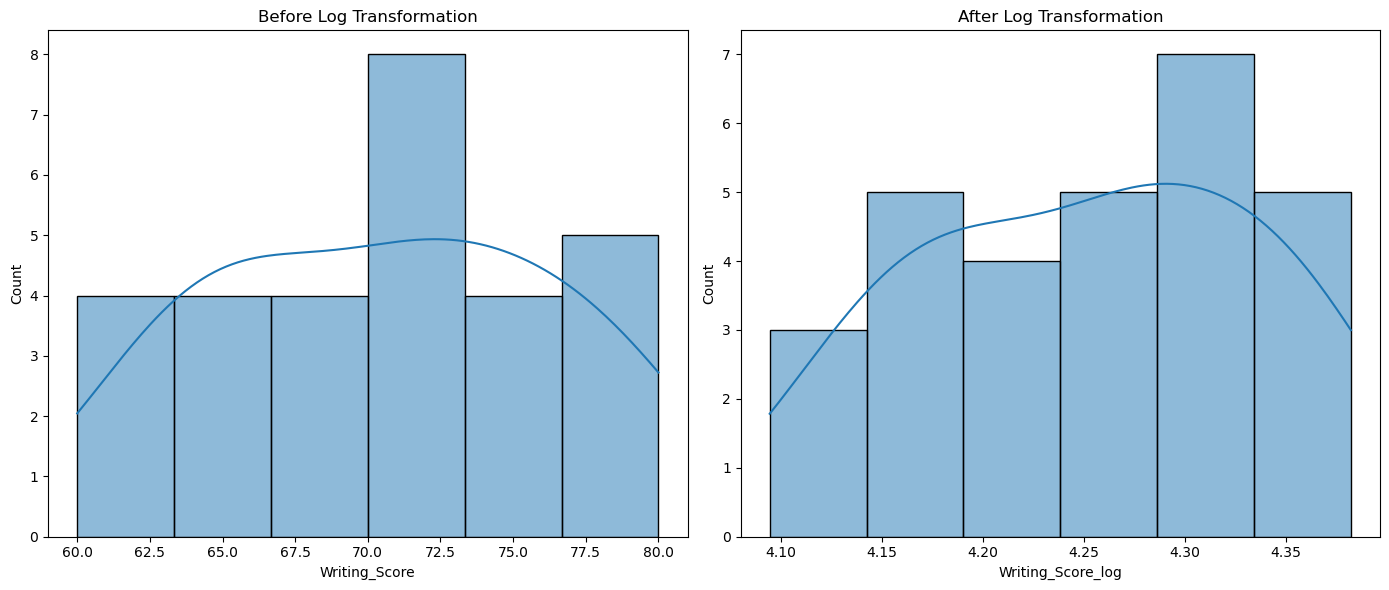

In [23]:
df['Writing_Score_log'] = np.log(df['Writing_Score'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data=df, x="Writing_Score", ax=axes[0], kde=True)
sns.histplot(data=df, x="Writing_Score_log", ax=axes[1], kde=True)
axes[0].set_title('Before Log Transformation')
axes[1].set_title('After Log Transformation')
plt.tight_layout()
plt.show()

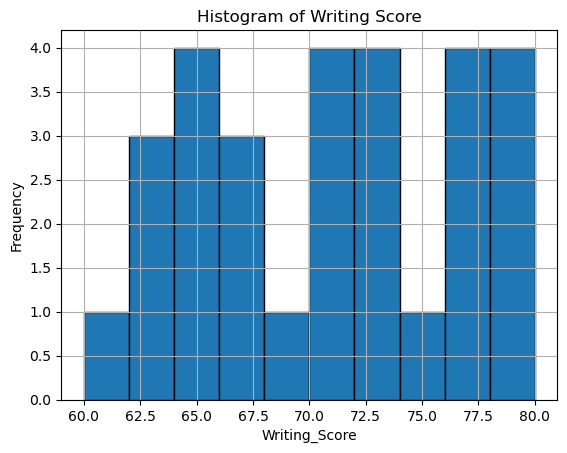

In [24]:
df['Writing_Score'].plot.hist(bins=10, edgecolor='black')
plt.title('Histogram of Writing Score')
plt.xlabel('Writing_Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()